# Dataset preparation

In [1]:
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset/archive/classes.csv")
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [3]:
art = [
    "vincent van gogh",
    "claude monet",
    "camille pissarro",
    "edgar degas",
    "ivan aivazovsky"    
]

In [4]:
df_art = df[df["artist"].apply(lambda x: x in art)]
df_art["artist"].value_counts()

vincent van gogh    1888
claude monet        1334
camille pissarro     884
edgar degas          611
ivan aivazovsky      577
Name: artist, dtype: int64

In [5]:
df_art = df_art[df_art["genre"].apply(lambda x: len(x.split()) == 1)]
df_art["genre"].value_counts()

['Impressionism']    2707
['Realism']           965
['Romanticism']       577
['Pointillism']        38
Name: genre, dtype: int64

In [6]:
df_art["genre"] = df_art["genre"].apply(lambda x: "".join([s for s in x if s.isalpha()]))
df_art["genre"].value_counts()

Impressionism    2707
Realism           965
Romanticism       577
Pointillism        38
Name: genre, dtype: int64

In [7]:
df_art = df_art.reset_index(drop=True)
df_art.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Impressionism/camille-pissarro_a-cottage-in-th...,camille pissarro,Impressionism,a-cottage-in-the-snow-1879,87f6816c9e5b248b,1729,1382,1,train
1,Impressionism/camille-pissarro_a-cowherd-on-th...,camille pissarro,Impressionism,a-cowherd-on-the-route-de-chou-pontoise-1874,d4d6f66c27720919,2239,1382,1,train
2,Impressionism/camille-pissarro_a-field-in-vare...,camille pissarro,Impressionism,a-field-in-varengeville-1899,cd9a86d5e3f10964,1666,1382,1,train
3,Impressionism/camille-pissarro_a-meadow-in-era...,camille pissarro,Impressionism,a-meadow-in-eragny-1889,d491e3ee0e6017d3,1698,1382,1,train
4,Impressionism/camille-pissarro_a-meadow-in-mor...,camille pissarro,Impressionism,a-meadow-in-moret-1901,b8a813c3ed397a98,1727,1382,1,train


In [8]:
df_art.groupby(["artist"])["genre"].value_counts()

artist            genre        
camille pissarro  Impressionism     787
                  Realism            56
                  Pointillism        38
claude monet      Impressionism    1320
                  Realism            14
edgar degas       Impressionism     600
                  Realism            11
ivan aivazovsky   Romanticism       577
vincent van gogh  Realism           884
Name: genre, dtype: int64

In [9]:
df_art_new = pd.DataFrame()
for a in art:
    
    mode = df_art[df_art["artist"] == a]["genre"].mode()
    df_info = df_art[(df_art["artist"] == a) & (df_art["genre"] == mode.values[0])]
    df_art_new = pd.concat([df_art_new, df_info], ignore_index=True)
    
df_art = df_art_new.copy()

In [10]:
df_art["artist"].value_counts()

claude monet        1320
vincent van gogh     884
camille pissarro     787
edgar degas          600
ivan aivazovsky      577
Name: artist, dtype: int64

In [11]:
X_train, X_test = train_test_split(df_art, test_size=0.3, random_state=42)

In [12]:
X_train["artist"].value_counts()

claude monet        926
vincent van gogh    600
camille pissarro    573
edgar degas         433
ivan aivazovsky     385
Name: artist, dtype: int64

In [13]:
X_test["artist"].value_counts()

claude monet        394
vincent van gogh    284
camille pissarro    214
ivan aivazovsky     192
edgar degas         167
Name: artist, dtype: int64

In [14]:
# dataset_genre = "dataset/dataset_genre"
# new_dirs = df_art["genre"].unique()

# if not os.path.isdir(dataset_genre):
#     os.mkdir(dataset_genre)
    
# for dirs in new_dirs:
#     if not os.path.isdir(os.path.join(dataset_genre, dirs)):
#         os.mkdir(os.path.join(dataset_genre, dirs))

# def copy(path):
#     shutil.copyfile(os.path.join("dataset/archive", path), os.path.join(dataset_genre, path))

# _ = df_art["filename"].apply(copy)

In [15]:
def copy_art(df_art, dataset_art):
    if not os.path.isdir(dataset_art):
        os.mkdir(dataset_art)

    for dirs in art:
        if not os.path.isdir(os.path.join(dataset_art, dirs)):
            os.mkdir(os.path.join(dataset_art, dirs))

    for idx in range(df_art.shape[0]):    
        path = df_art.iloc[idx, 0]
        path_art = df_art.iloc[idx, 1]
        shutil.copyfile(os.path.join("dataset/archive", path), os.path.join(dataset_art, path_art, os.path.split(path)[1]))

        
dataset_train = "dataset/dataset_art_train/"
dataset_test = "dataset/dataset_art_test/"

copy_art(X_train, dataset_train)
copy_art(X_test, dataset_test)

# Model preparation

In [16]:
# !pip install protobuf==3.20
# !pip install tensorflow_hub opencv-python

In [17]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
import random
import cv2

import tensorflow as tf
import tensorflow_hub as hub
#
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.10.0
Hub version: 0.12.0
GPU is available


In [19]:
dataset_train = "dataset/dataset_art_train/"
model_name = "inception_v3"

model_handle_map = {
            "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5",
        }

model_image_size_map = {
            "inception_v3": 299,
        }

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 16

Selected model: inception_v3 : https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5
Input size (299, 299)


In [20]:
def build_dataset(subset):
      return tf.keras.preprocessing.image_dataset_from_directory(
          dataset_train,
          validation_split=.20,
          subset=subset,
          label_mode="categorical",
          seed=123,
          image_size=IMAGE_SIZE,
          batch_size=1)

train_ds = build_dataset("training")
class_names = tuple(train_ds.class_names)
train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(BATCH_SIZE)
train_ds = train_ds.repeat()

normalization_layer = tf.keras.layers.Rescaling(1. / 255)
preprocessing_model = tf.keras.Sequential([normalization_layer])
do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
    preprocessing_model.add(
          tf.keras.layers.RandomRotation(40))
    preprocessing_model.add(
          tf.keras.layers.RandomTranslation(0, 0.2))
    preprocessing_model.add(
          tf.keras.layers.RandomTranslation(0.2, 0))
    
train_ds = train_ds.map(lambda images, labels:
                        (preprocessing_model(images), labels))

val_ds = build_dataset("validation")
valid_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(BATCH_SIZE)
val_ds = val_ds.map(lambda images, labels:
                    (normalization_layer(images), labels))

do_fine_tuning = True

Found 2917 files belonging to 5 classes.
Using 2334 files for training.
Metal device set to: Apple M2


2023-12-14 02:45:23.929623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-14 02:45:23.929746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 2917 files belonging to 5 classes.
Using 583 files for validation.


In [21]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(len(class_names),
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 21,778,597
Non-trainable params: 34,432
_________________________________________________________________


In [22]:
model.compile(
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
      metrics=['accuracy'])

In [23]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE
hist = model.fit(
    train_ds,
    epochs=25, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps).history

2023-12-14 02:45:40.996934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-14 02:45:41.001724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25


2023-12-14 02:45:44.680213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


145/145 [==============================] - ETA: 0s - loss: 1.2809 - accuracy: 0.6651

2023-12-14 02:48:19.187248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


145/145 [==============================] - 177s 1s/step - loss: 1.2809 - accuracy: 0.6651 - val_loss: 1.0514 - val_accuracy: 0.8003
Epoch 2/25
145/145 [==============================] - 203s 1s/step - loss: 1.0197 - accuracy: 0.8089 - val_loss: 1.0355 - val_accuracy: 0.8420
Epoch 3/25
145/145 [==============================] - 202s 1s/step - loss: 0.9471 - accuracy: 0.8434 - val_loss: 0.9628 - val_accuracy: 0.8385
Epoch 4/25
145/145 [==============================] - 191s 1s/step - loss: 0.9044 - accuracy: 0.8693 - val_loss: 0.9864 - val_accuracy: 0.8559
Epoch 5/25
145/145 [==============================] - 186s 1s/step - loss: 0.8770 - accuracy: 0.8852 - val_loss: 1.1179 - val_accuracy: 0.8021
Epoch 6/25
145/145 [==============================] - 204s 1s/step - loss: 0.8463 - accuracy: 0.9029 - val_loss: 0.9062 - val_accuracy: 0.8889
Epoch 7/25
145/145 [==============================] - 223s 2s/step - loss: 0.8332 - accuracy: 0.9154 - val_loss: 0.8897 - val_accuracy: 0.8802
Epoch 8/25

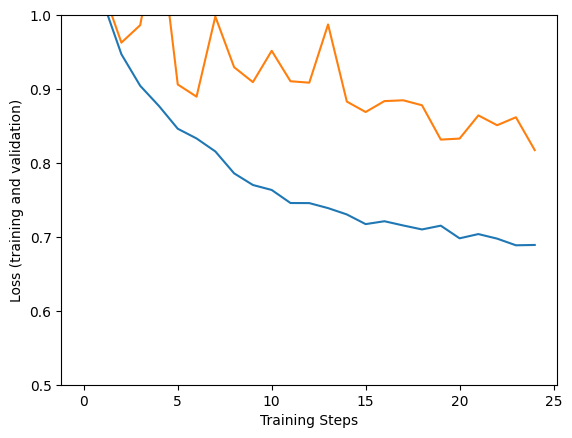

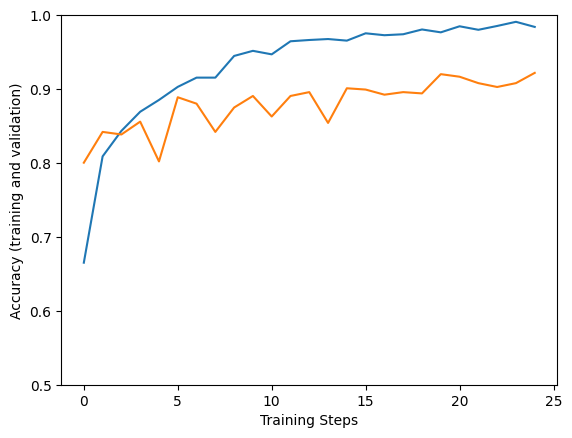

In [24]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.5, 1])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.5, 1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

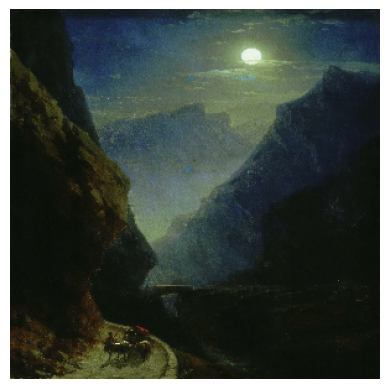

2023-12-14 12:36:24.193343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
True label: ivan aivazovsky
Predicted label: ivan aivazovsky


In [25]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

In [26]:
saved_model_path = f"models/{model_name}"
tf.saved_model.save(model, saved_model_path)

2023-12-14 12:36:27.035697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/inception_v3/assets


INFO:tensorflow:Assets written to: models/inception_v3/assets


# Model inference

In [1]:
import os
import matplotlib.pylab as plt
import numpy as np
import random
import cv2
from sklearn.metrics import precision_recall_fscore_support as score
import tensorflow as tf

print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.10.0
GPU is available


In [2]:
saved_model_path = "models/inception_v3"
loaded = tf.saved_model.load(saved_model_path)

Metal device set to: Apple M2


2023-12-14 21:06:50.932351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-14 21:06:50.932594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
dataset_test = "dataset/dataset_art_test/"

class_names = (
        "camille pissarro",
        "claude monet",
        "edgar degas",
        "ivan aivazovsky",   
        "vincent van gogh",
    )

file_info = []
for c in class_names:
    file_info += [f"{c}/{i}" for i in os.listdir(os.path.join(dataset_test, c))]

In [4]:
IMAGE_SIZE = (299, 299)
normalization_layer = tf.keras.layers.Rescaling(1. / 255)

y_original = []
prediction = []

for fi in file_info:
    y_org = fi.split('/')[0]
    y_org = class_names.index(y_org)
    y_original.append(y_org)

    img = tf.keras.utils.load_img(
        os.path.join(dataset_test, fi), target_size=(IMAGE_SIZE)
    )

    img_array = tf.keras.utils.img_to_array(img)
    normalization = normalization_layer(img_array)
    img_array = tf.expand_dims(normalization, 0)

    prediction_scores = loaded(img_array)
    predicted_index = np.argmax(prediction_scores)
    prediction.append(predicted_index)

2023-12-14 21:06:58.451147: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-14 21:06:58.465056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [5]:
precision, recall, f1, _ = score(y_original, prediction)

print('classes: {}'.format(class_names))
print('precision: {}'.format([round(c, 2) for c in precision]))
print('recall: {}'.format([round(c, 2) for c in recall]))
print('fscore: {}'.format([round(c, 2) for c in f1]))
print()
print('mean precision: {}'.format(round(np.mean(precision), 2)))
print('mean recall: {}'.format(round(np.mean(recall), 2)))
print('mean fscore: {}'.format(round(np.mean(f1), 2)))

classes: ('camille pissarro', 'claude monet', 'edgar degas', 'ivan aivazovsky', 'vincent van gogh')
precision: [0.84, 0.92, 0.86, 0.98, 0.94]
recall: [0.83, 0.93, 0.86, 0.98, 0.94]
fscore: [0.84, 0.93, 0.86, 0.98, 0.94]

mean precision: 0.91
mean recall: 0.91
mean fscore: 0.91


Original label: camille pissarro
Predicted label: camille pissarro


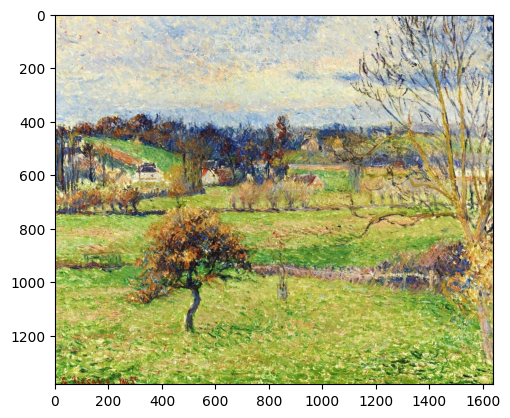

In [7]:
idx = 4
image = cv2.imread(os.path.join(dataset_test, file_info[idx]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Original label: " + class_names[y_original[idx]])
print("Predicted label: " + class_names[prediction[idx]])

plt.imshow(image);